In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df = df.drop('id', axis = 1)
print(df.shape)
df.head()

(30471, 291)


,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


Нужно научиться предсказывать цену.В сорвеновании использовали
RMSLE, но как мы знаем, можно прологарифмировать таргет, и оптимизировать MSE

In [5]:
df = df.assign(log_price_doc = np.log1p(df['price_doc']))
df = df.drop('price_doc', axis = 1)

In [6]:
df

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,15.581952
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,15.607270
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,15.555977
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,16.388123
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16.608603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,15,5,0,15,26,1,2,84,6,15.816991
30467,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,313,128,24,98,182,1,82,171,15,17.034386
30468,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,15.757264
30469,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,22,1,1,6,31,1,4,65,7,16.418200


In [7]:
#Начнем EDA и поработаем с пропусками
numeric_columns = df.loc[:,df.dtypes !=np.object].columns

C:\Users\Диман\AppData\Local\Temp\ipykernel_11932\1861272611.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_columns = df.loc[:,df.dtypes !=np.object].columns


In [8]:
df.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,15.609483
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,0.604574
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.512935
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,15.371548
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,15.651990
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,15.931766
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,18.526041


In [9]:
numeric_columns

Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'kitch_sq', 'state', 'area_m',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'log_price_doc'],
      dtype='object', length=275)

In [10]:
#Заполним пропуски вещественных значением средними значениями

In [11]:
np.object

C:\Users\Диман\AppData\Local\Temp\ipykernel_11932\3064658071.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object


object

In [12]:
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [13]:
df

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
0,2011-08-20,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,9,4,0,13,22,1,0,52,4,15.581952
1,2011-08-23,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,15,3,0,15,29,1,10,66,14,15.607270
2,2011-08-27,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,10,3,0,11,27,0,4,67,10,15.555977
3,2011-09-01,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,11,2,1,4,4,0,0,26,3,16.388123
4,2011-09-05,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,319,108,17,135,236,2,91,195,14,16.608603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,...,15,5,0,15,26,1,2,84,6,15.816991
30467,2015-06-30,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,...,313,128,24,98,182,1,82,171,15,17.034386
30468,2015-06-30,45,34.403271,10.0,20.000000,1.000000,3068.057097,1.000000,1.000000,1.000000,...,1,1,0,2,12,0,1,11,1,15.757264
30469,2015-06-30,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,...,22,1,1,6,31,1,4,65,7,16.418200


In [14]:
df[numeric_columns].isna().sum()

full_sq               0
life_sq               0
floor                 0
max_floor             0
material              0
                     ..
mosque_count_5000     0
leisure_count_5000    0
sport_count_5000      0
market_count_5000     0
log_price_doc         0
Length: 275, dtype: int64

In [15]:
#изучим корреляцию вещественных признаков
df[numeric_columns].corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
full_sq,1.000000,0.153837,0.089450,0.057390,0.015820,-0.002532,0.334760,0.009640,-0.038544,0.056303,...,0.039083,0.040059,0.043560,0.026895,0.028579,0.021568,0.030218,0.001580,-0.041254,0.271408
life_sq,0.153837,1.000000,0.038603,0.034483,0.010200,-0.002324,0.169211,0.000651,-0.058546,0.043262,...,0.024240,0.026800,0.029921,0.014980,0.015187,0.008870,0.019099,-0.012124,-0.043462,0.119971
floor,0.089450,0.038603,1.000000,0.373873,-0.007439,0.000855,-0.004654,-0.006957,-0.083337,-0.019321,...,-0.034680,-0.029541,-0.022228,-0.044265,-0.045475,-0.012222,-0.044093,-0.101769,-0.123534,0.117870
max_floor,0.057390,0.034483,0.373873,1.000000,0.045915,-0.000215,-0.014220,0.020345,-0.061203,-0.079591,...,-0.033935,-0.028423,-0.024940,-0.040653,-0.040605,-0.048229,-0.040977,-0.083772,-0.094960,0.078692
material,0.015820,0.010200,-0.007439,0.045915,1.000000,-0.004029,-0.026924,0.038747,-0.031320,0.001012,...,0.042947,0.036865,0.037508,0.032432,0.037626,0.041689,0.037472,0.082620,0.063992,0.011807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mosque_count_5000,0.021568,0.008870,-0.012222,-0.048229,0.041689,0.014699,0.051980,0.010915,0.068570,-0.086786,...,0.529434,0.492859,0.481481,0.502028,0.550342,1.000000,0.499376,0.518500,0.242078,0.130745
leisure_count_5000,0.030218,0.019099,-0.044093,-0.040977,0.037472,-0.000601,0.049396,-0.005270,-0.002915,-0.195067,...,0.986206,0.975462,0.948391,0.969029,0.975259,0.499376,1.000000,0.809169,0.463053,0.134175
sport_count_5000,0.001580,-0.012124,-0.101769,-0.083772,0.082620,0.004257,0.075427,0.014149,0.143328,-0.416222,...,0.824139,0.778770,0.753384,0.825883,0.847771,0.518500,0.809169,1.000000,0.733897,0.223386
market_count_5000,-0.041254,-0.043462,-0.123534,-0.094960,0.063992,0.005333,0.051672,0.022122,0.203451,-0.449849,...,0.432265,0.380154,0.353270,0.482547,0.514344,0.242078,0.463053,0.733897,1.000000,0.162569


In [16]:
#таблица слишком большая для анализа

In [17]:
#секретная функция со стековерфлоу для поиска коррелирующих между собой пар
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
railroad_station_walk_km              railroad_station_walk_min                1.000000
public_transport_station_km           public_transport_station_min_walk        1.000000
children_school                       7_14_all                                 1.000000
children_preschool                    0_6_all                                  1.000000
metro_min_walk                        metro_km_walk                            1.000000
raion_build_count_with_material_info  raion_build_count_with_builddate_info    0.999990
young_all                             0_13_all                                 0.999885
young_female                          0_13_female                              0.999871
young_male                            0_13_male                                0.999861
full_all                              female_f                                 0.999850
                                      male_f                                   0.999788
young_

In [18]:
#Удалим колонки, где корреляция больше 0.9
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

correlation(df, 0.9)


C:\Users\Диман\AppData\Local\Temp\ipykernel_11932\2036015204.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


In [19]:
df.shape

(30471, 157)

In [21]:
#Посмотрим на квазиконстантные признаки
from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1) #0.1 это похоже значение дисперсии
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]
df[constant_cols]

KeyError: "['children_preschool', 'children_school', 'school_quota', 'school_education_centers_raion', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'build_count_slag', 'raion_build_count_with_builddate_info', 'build_count_1921-1945', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'railroad_station_walk_min', 'railroad_station_avto_km', 'public_transport_station_min_walk', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'zd_vokzaly_avto_km', 'radiation_km', 'stadium_km', 'basketball_km', 'public_healthcare_km', 'shopping_centers_km', 'preschool_km', 'big_church_km', 'museum_km', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_count_500_na_price', 'cafe_count_500_price_500', 'cafe_count_500_price_1000', 'cafe_count_500_price_1500', 'cafe_count_500_price_2500', 'church_count_500', 'office_count_1000', 'cafe_count_1000', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000', 'cafe_count_1000_na_price', 'cafe_count_1000_price_500', 'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500', 'cafe_count_1000_price_4000', 'big_church_count_1000', 'church_count_1000', 'prom_part_1500', 'office_count_1500', 'office_sqm_1500', 'cafe_count_1500', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500', 'cafe_count_1500_na_price', 'cafe_count_1500_price_500', 'cafe_count_1500_price_1000', 'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000', 'big_church_count_1500', 'church_count_1500', 'leisure_count_1500', 'green_part_2000', 'office_count_2000', 'trc_count_2000', 'cafe_count_2000', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'cafe_count_2000_na_price', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000', 'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000', 'cafe_count_2000_price_high', 'big_church_count_2000', 'church_count_2000', 'leisure_count_2000', 'sport_count_2000', 'office_count_3000', 'office_sqm_3000', 'cafe_count_3000', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'cafe_count_3000_na_price', 'cafe_count_3000_price_500', 'cafe_count_3000_price_1000', 'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500', 'cafe_count_3000_price_4000', 'cafe_count_3000_price_high', 'big_church_count_3000', 'church_count_3000', 'leisure_count_3000', 'office_sqm_5000', 'trc_count_5000', 'cafe_count_5000', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000', 'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000', 'cafe_count_5000_price_high', 'big_church_count_5000', 'church_count_5000', 'leisure_count_5000', 'sport_count_5000'] not in index"

In [ ]:
#оставим квазиконстантные признаки, все равно их занулит регуляризатор в будущем

Обработка категориальных признаков

In [22]:
#Посмотрим на категориальные колонки
categorical_columns = df.loc[:,df.dtypes == np.object].columns
#изучим категориальные колонки
df.describe(include='object')

C:\Users\Диман\AppData\Local\Temp\ipykernel_11932\939048789.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = df.loc[:,df.dtypes == np.object].columns


,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [23]:
#Преобразуем категориальные колонки
for col in categorical_columns:
    if col != 'timestamp':
        if df[col].nunique() < 5:
            one_hot = pd.get_dummies(df[col], prefix = col, drop_first=True)
            df = pd.concat((df.drop(col, axis = 1), one_hot), axis = 1)
        else:
            mean_target = df.groupby(col)['log_price_doc'].mean()
            df[col] = df[col].map(mean_target)

In [24]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,0,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,0,0
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,1,0,0,0,0,0,0,0
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,0,0
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,1,1,0,0,0,0,0,1


In [25]:
#Поработаем с датой
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df.timestamp.dt.month
df['year'] = df.timestamp.dt.year

In [26]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,8,2011
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,1,0,0,0,0,0,0,0,8,2011
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,9,2011
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,1,1,0,0,0,0,0,1,9,2011


In [27]:
#Отсортируем по timestamp
df = df.sort_values('timestamp')
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,8,2011
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,1,0,0,0,0,0,0,0,8,2011
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,9,2011
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,1,1,0,0,0,0,0,1,9,2011


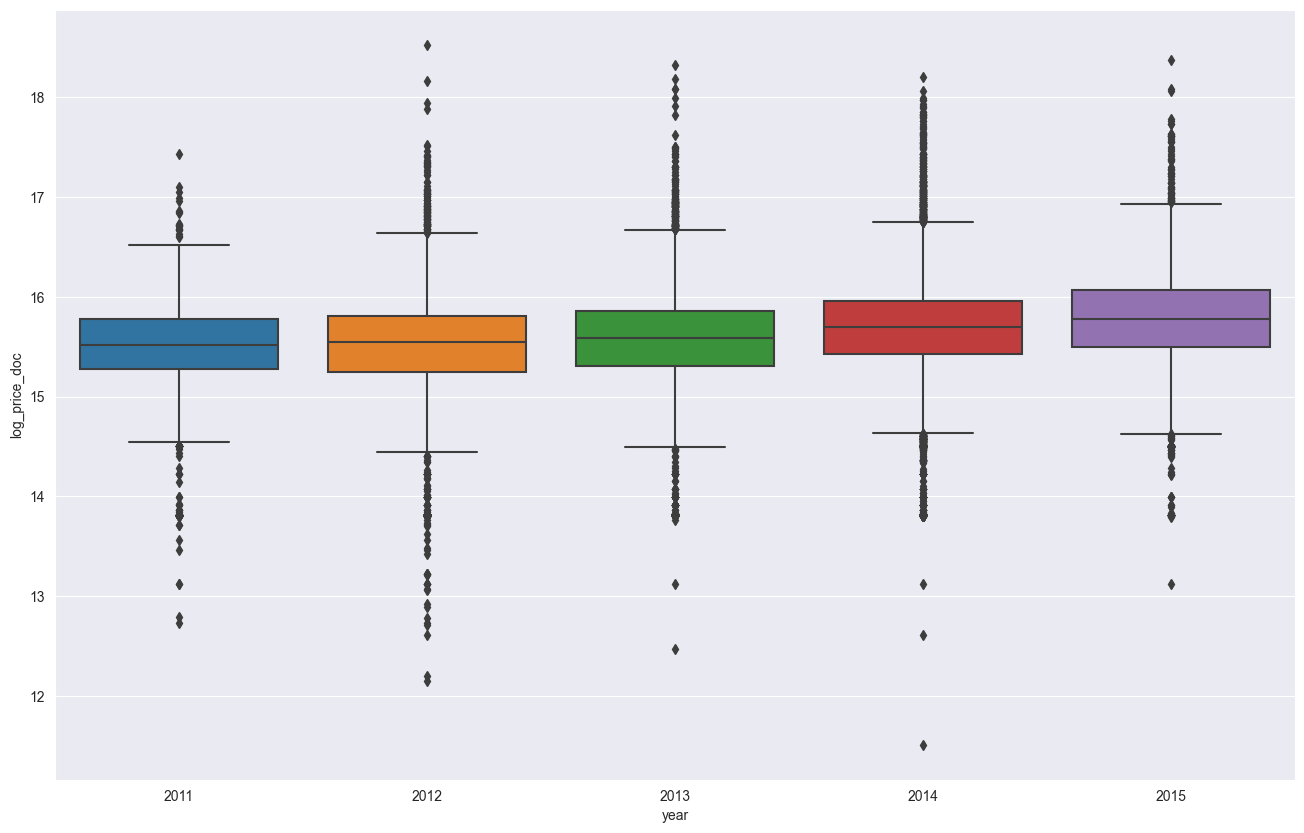

In [28]:
#Порисум графики некоторых признаков

import matplotlib.pyplot as plt
import seaborn as sns
#Например распределение таргета по годам
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x = df['year'].astype('category'), data=df)
plt.show()

In [29]:
#Видим что по чуть-чуть но стабильно каждый год цена квартиры растёт,
#даже логарифмированная
#закодируем год через one code hot encoding
one_hot = pd.get_dummies(df['year'], prefix='year', drop_first=True)
df = pd.concat((df.drop('year', axis=1), one_hot), axis=1)
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year_2012,year_2013,year_2014,year_2015
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,8,0,0,0,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,8,0,0,0,0
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,8,0,0,0,0
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,9,0,0,0,0
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,1,9,0,0,0,0


In [30]:
#колонку месяц тоже закодируем через one hot code
one_hot = pd.get_dummies(df['month'], prefix='month', drop_first=True)
df = pd.concat((df.drop('month', axis=1), one_hot), axis=1)
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,1,0,0,0,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,1,0,0,0,0
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,1,0,0,0,0
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,1,0,0,0
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,1,0,0,0


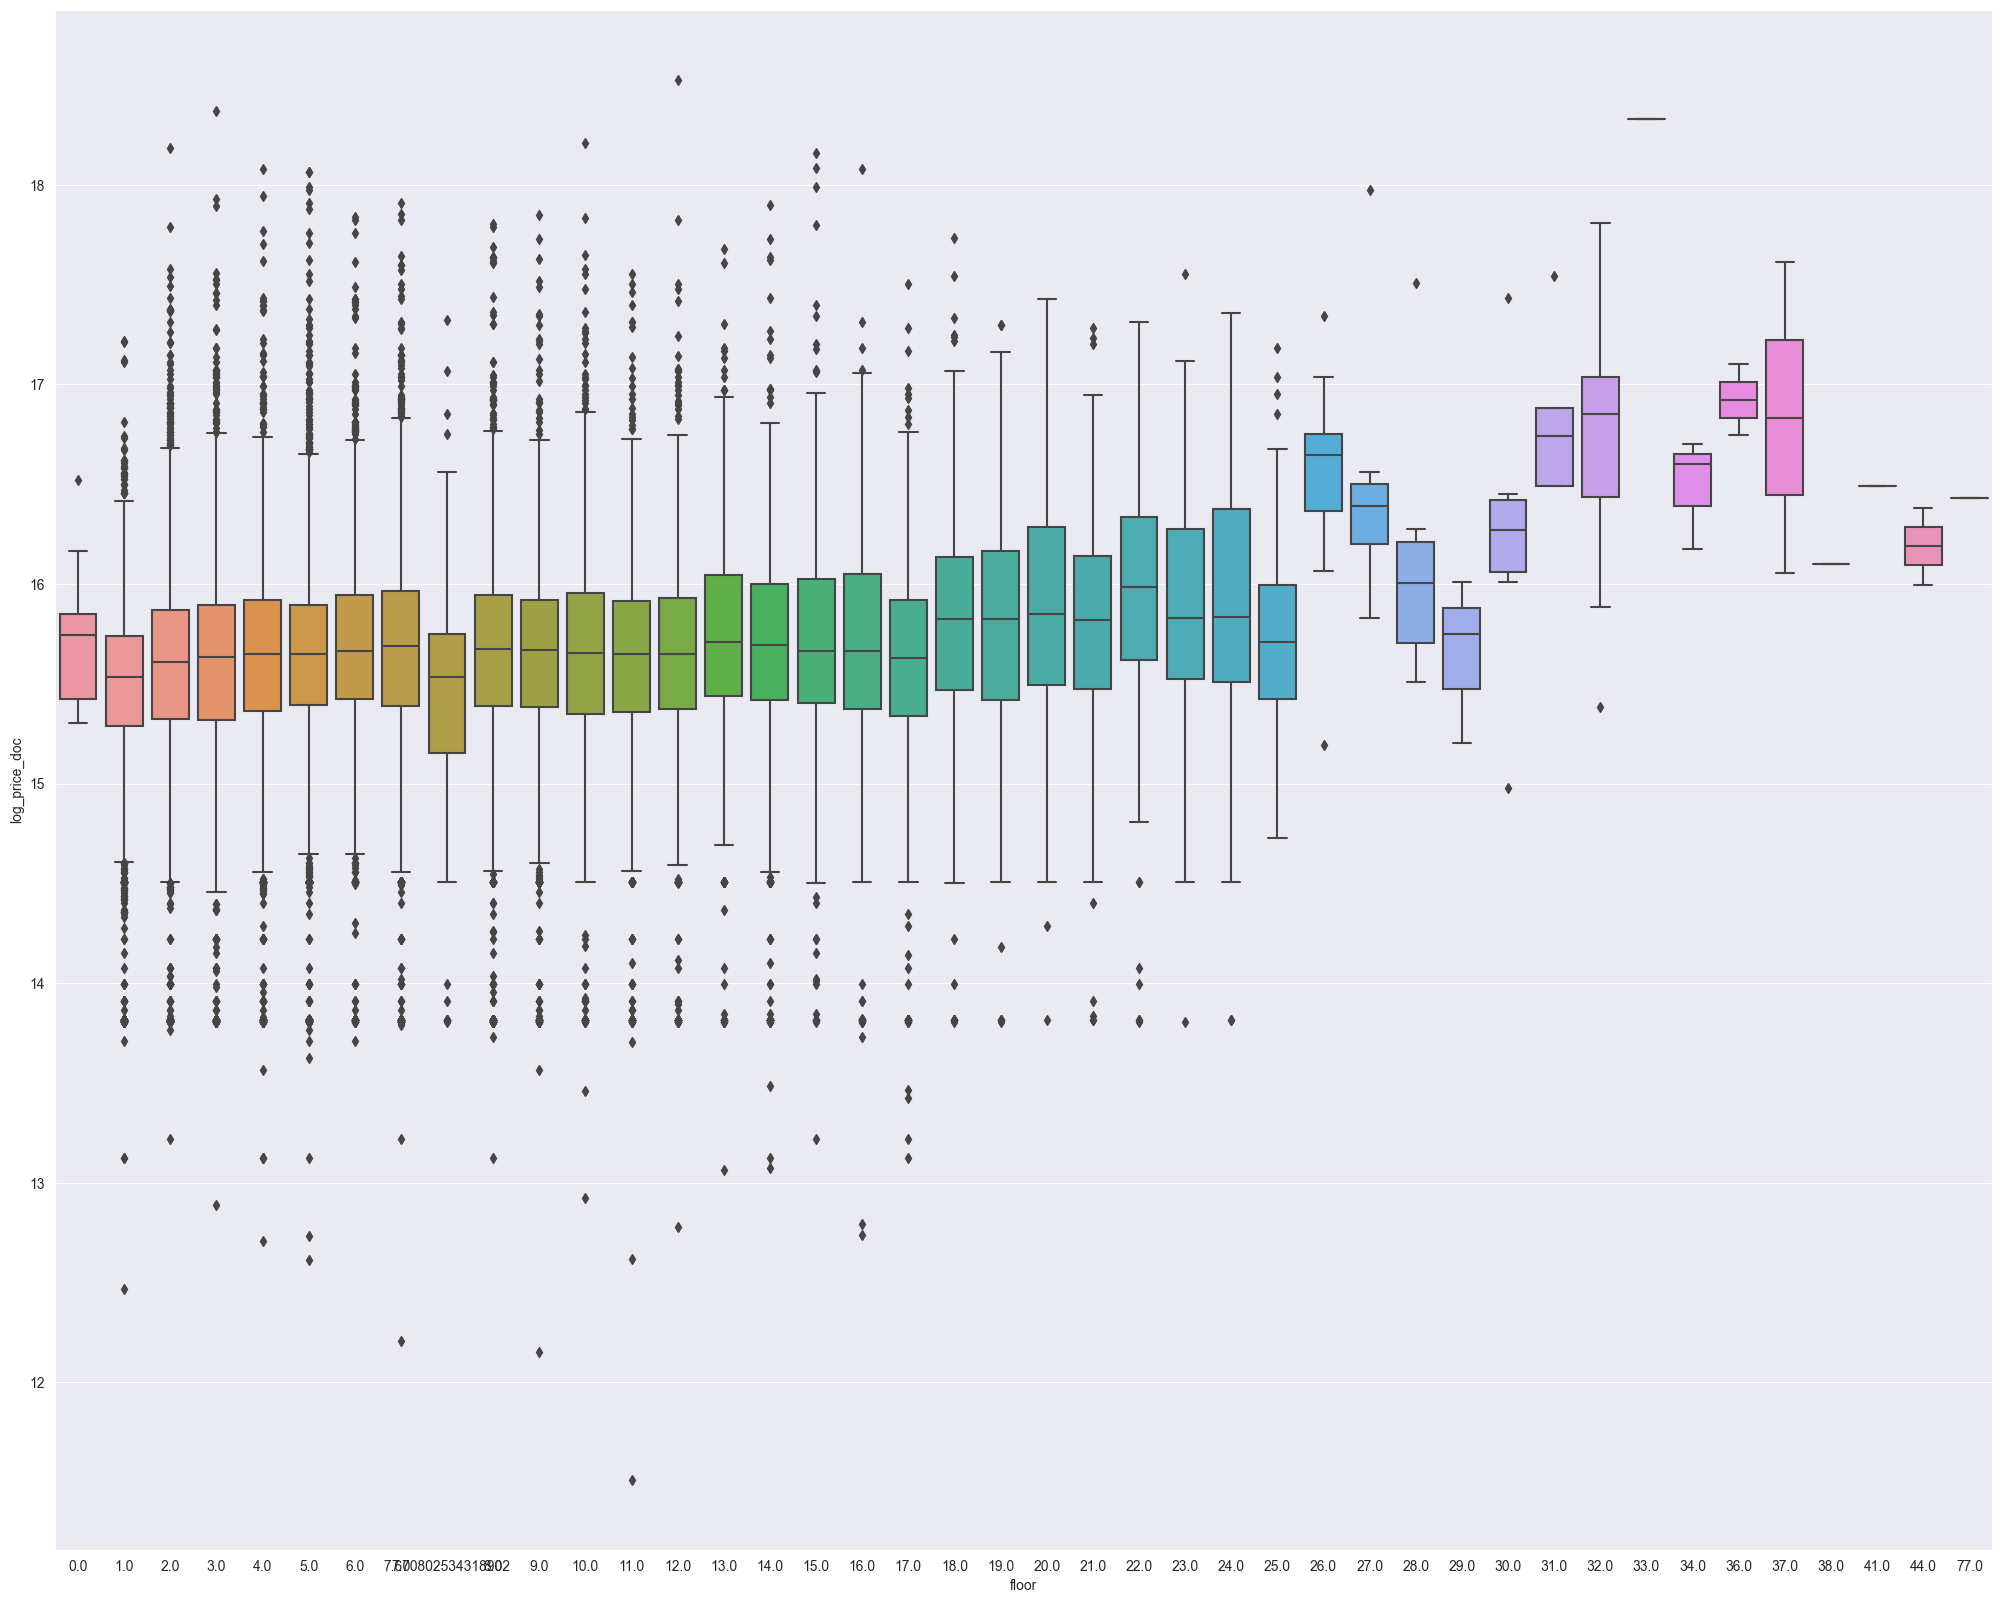

In [31]:
#Распределение таргета по этажу
fig = plt.figure()
fig.set_size_inches(25, 20)

sns.boxplot(y='log_price_doc', x = df['floor'].astype('category'), data=df)
plt.show()

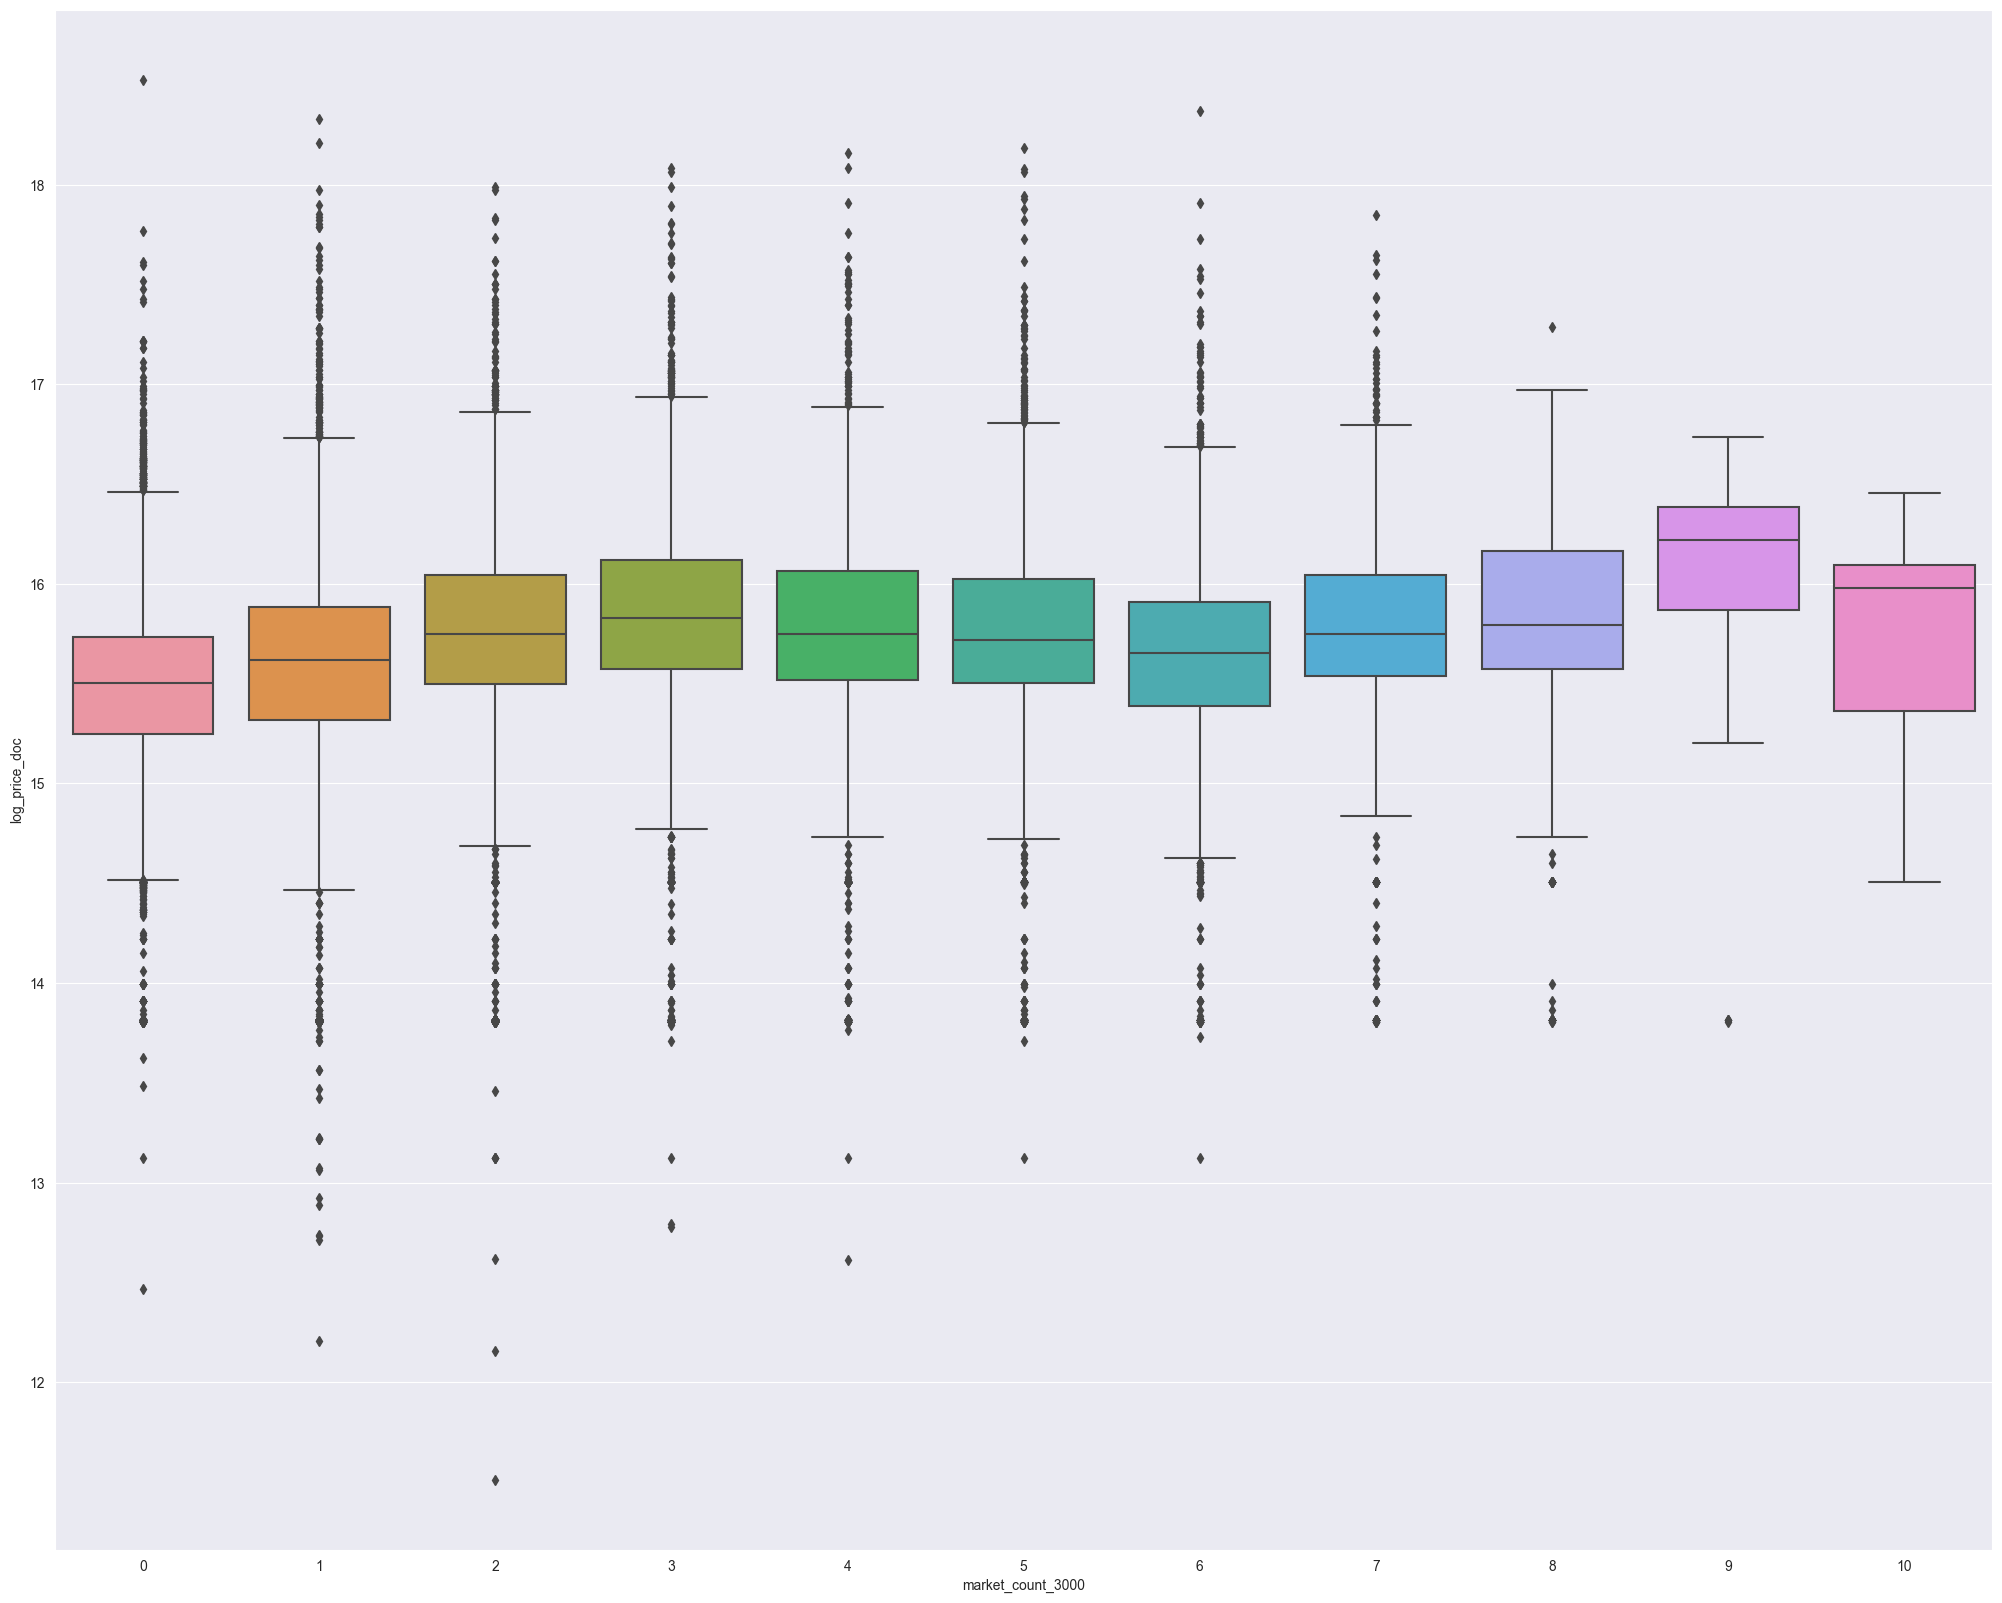

In [32]:
#Распределение по кол-ву магазинов в радиусе 3000 м
fig = plt.figure()
fig.set_size_inches(25, 20)

sns.boxplot(y='log_price_doc', x = df['market_count_3000'].astype('category'), data=df)
plt.show()

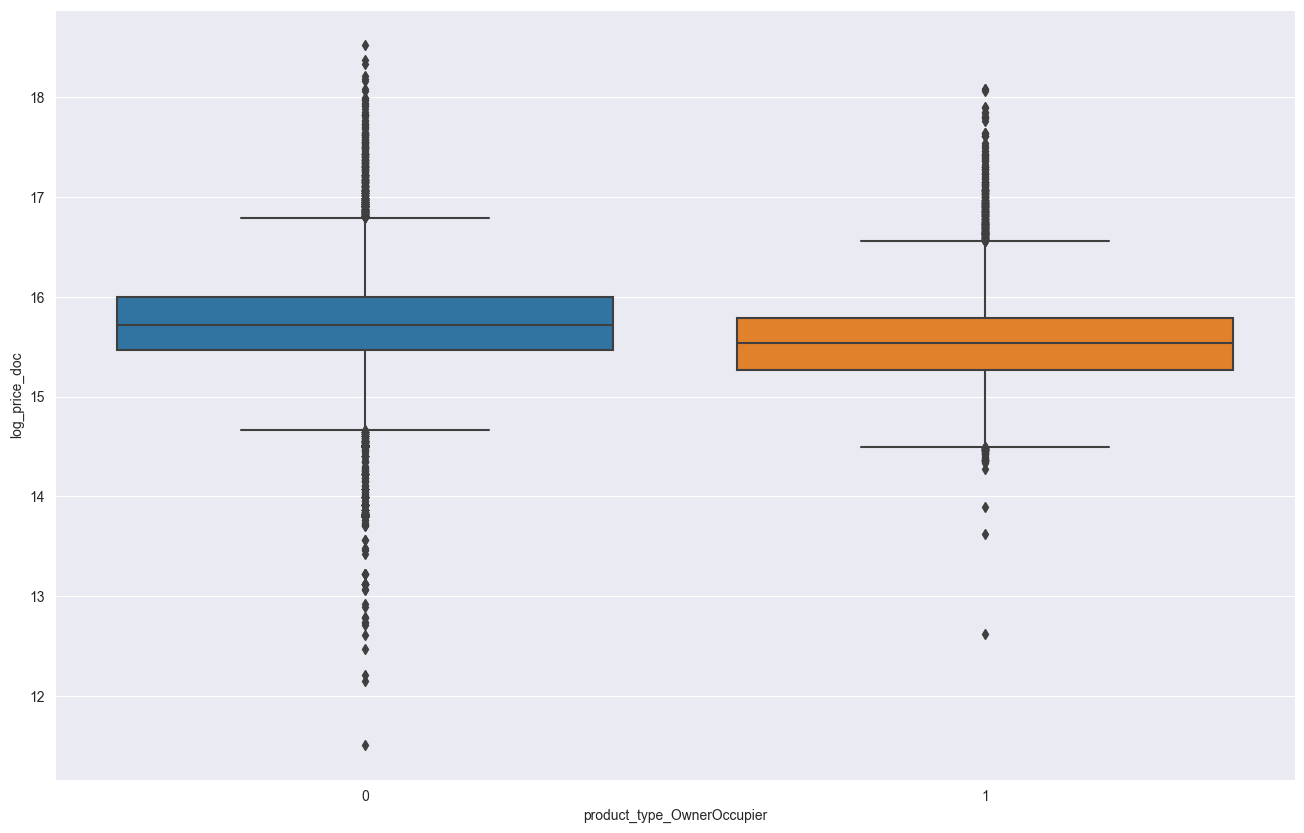

In [33]:
#Распределение по типу недвижимости
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x = df['product_type_OwnerOccupier'].astype('category'), data=df)
plt.show()

In [37]:
#уберем timestamp
df = df.drop('timestamp', axis=1)

KeyError: "['timestamp'] not found in axis"

In [38]:
#отделим таргеты от объектов
X = df.drop('log_price_doc', axis=1)
Y = df['log_price_doc']

object